In [78]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

### Feature forklaring
- User Type: 
    - Customer = 24-hour pass or 3-day pass
    - Subscriber = Annual Member
- Gender:
    - 0 -> Unknown
    - 1 -> Male
    - 2 -> Female

In [80]:
f=pd.read_csv(r"Trips_2018.csv")

In [81]:
f.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [82]:
f = f.rename({"Unnamed: 0": "Trip ID"}, axis="columns")
f = f.set_index("Trip ID")

In [83]:
f.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
Trip ID,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [84]:
f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
sm_dummies=pd.get_dummies(f, columns=['usertype'])
sm_dummies.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,weekday,is_weekend,usertype_Customer,usertype_Subscriber
Trip ID,,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,0,False,False,True
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,0,False,False,True
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,0,False,False,True
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,0,False,False,True
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,0,False,False,True


In [85]:
f.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
dtype: object

In [86]:
sm_dummies.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
usertype_Customer                    bool
usertype_Subscriber                  bool
dtype: object

# Clustering

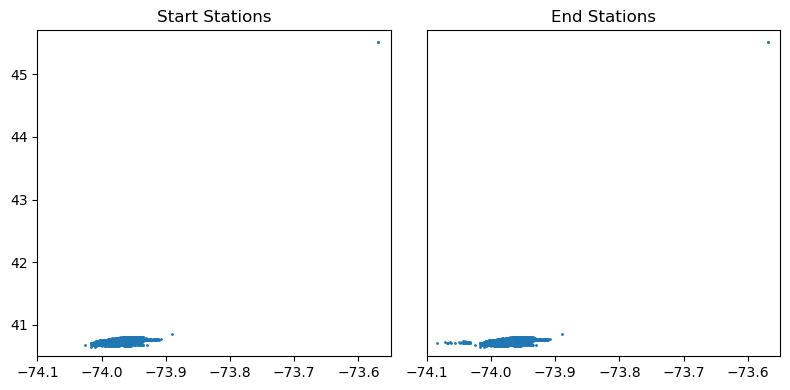

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.55), (40.5, 45.7)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
ax1.scatter(start_station_df['start_station_longitude'],start_station_df['start_station_latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
ax2.scatter(end_station_df['end_station_longitude'],end_station_df['end_station_latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

# Remove outlier

[]

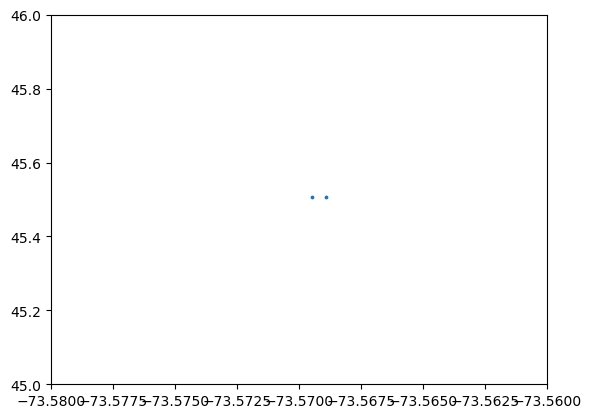

In [88]:
plt.scatter(start_station_df['start_station_longitude'], start_station_df['start_station_latitude'], s=3)
plt.xlim((-73.58, -73.56))
plt.ylim((45, 46))
plt.plot()

In [89]:
start_station_df[start_station_df.start_station_longitude > -73.6]

,start_station_latitude,start_station_longitude
start_station_id,,
3488.0,45.506364,-73.569463
3650.0,45.506264,-73.568906


In [90]:
end_station_df[end_station_df.end_station_longitude > -73.6]

,end_station_latitude,end_station_longitude
end_station_id,,
3488.0,45.506364,-73.569463
3650.0,45.506264,-73.568906


In [91]:
f[
    (f.start_station_id == 3488.0) &
    (f.start_station_id != f.end_station_id)
]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,


In [92]:
f[
    (f.end_station_id == 3488.0) &
    (f.start_station_id != f.end_station_id)
]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,
8772457,1634200,2018-07-18 18:27:51.511,2018-08-06 16:24:32.388,3036.0,40.662908,-73.999722,3488.0,45.506364,-73.569463,24354,Subscriber,1988,1,2,False


In [93]:
f[
    (f.start_station_id == 3650.0) &
    (f.start_station_id != f.end_station_id)
]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,


In [94]:
f[
    (f.end_station_id == 3650.0) &
    (f.start_station_id != f.end_station_id)
]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,


In [95]:
f[
    (f.start_station_id == 3488) | (f.end_station_id == 3488) |
    (f.start_station_id == 3650) | (f.end_station_id == 3650)
].describe()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,weekday
count,8.200000e+01,82,82,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2.954804e+04,2018-03-14 21:46:53.854036736,2018-03-15 05:59:22.416878080,3636.585366,45.447203,-73.574180,3642.097561,45.506269,-73.568933,23651.158537,1985.792683,1.012195,1.378049
min,6.200000e+01,2018-01-08 16:03:59.375000,2018-01-08 16:09:41.338000,3036.000000,40.662908,-73.999722,3488.000000,45.506264,-73.569463,17667.000000,1969.000000,0.000000,0.000000
25%,2.235000e+02,2018-01-26 10:59:14.185999872,2018-01-26 12:46:01.522750208,3650.000000,45.506264,-73.568906,3650.000000,45.506264,-73.568906,21928.000000,1986.000000,1.000000,0.000000
50%,9.390000e+02,2018-02-20 14:11:07.361499904,2018-02-20 14:12:41.880000,3650.000000,45.506264,-73.568906,3650.000000,45.506264,-73.568906,24354.000000,1986.000000,1.000000,1.000000
75%,2.653500e+03,2018-05-08 17:10:19.270750208,2018-05-08 17:19:55.421250048,3650.000000,45.506264,-73.568906,3650.000000,45.506264,-73.568906,24354.000000,1986.000000,1.000000,3.000000
max,1.634200e+06,2018-07-18 18:27:51.511000,2018-08-06 16:24:32.388000,3650.000000,45.506364,-73.568906,3650.000000,45.506364,-73.568906,24354.000000,1988.000000,2.000000,4.000000
std,1.827257e+05,NaN,NaN,73.784128,0.534860,0.047574,35.110974,0.000022,0.000121,1256.116408,2.752049,0.248149,1.329998


We have two outliers stations with id 3448 and 3650. We found that they are both placed right next to one another in Montreal, Canada. From the above cells, it is apparent that all but one trips completed with start or end point in Montreal (station 3488 and 3650) are trips in Montreal only.

There is a single trip from Brooklyn (station 3036) to Montreal (station 3488). It's duration is 18.9 days and out of 17 million trips completed, this one is the only one travelling to Montreal. Therefore we classify stations in Montreal as not relevant and outliers.

In [96]:
f = f.drop(
    f[
        (f.start_station_id == 3488) | (f.end_station_id == 3488) |
        (f.start_station_id == 3650) | (f.end_station_id == 3650)
    ].index
)

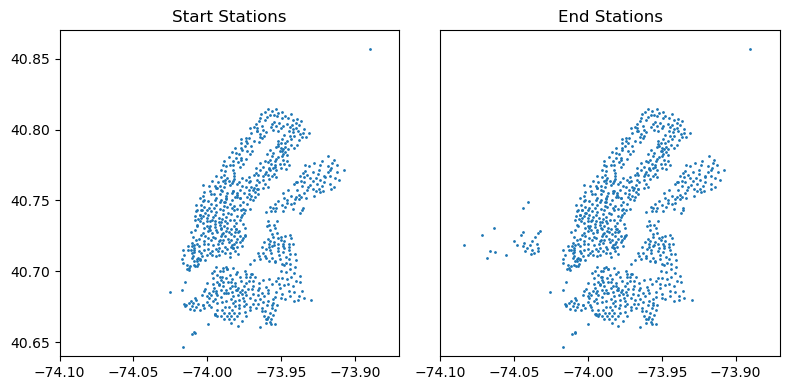

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.87), (40.64, 40.87)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
start_station_df = start_station_df.rename(
    {
        "start_station_latitude": "latitude", 
        "start_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax1.scatter(start_station_df['longitude'],start_station_df['latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
end_station_df = end_station_df.rename(
    {
        "end_station_latitude": "latitude", 
        "end_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax2.scatter(end_station_df['longitude'],end_station_df['latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

## DBScan

In [98]:
from sklearn.cluster import DBSCAN
dbs_start_station=DBSCAN(min_samples=5, eps=0.004) 
dbs_end_station=DBSCAN(min_samples=5, eps=0.004)
dbs_start_station.fit(start_station_df)
dbs_end_station.fit(end_station_df)

,eps,0.004
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [99]:
np.unique(dbs_start_station.labels_), np.unique(dbs_end_station.labels_)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18]))

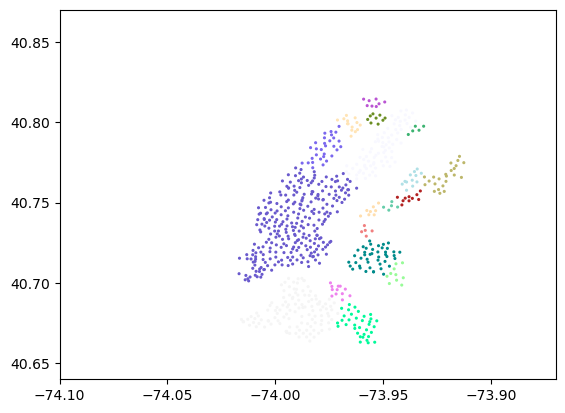

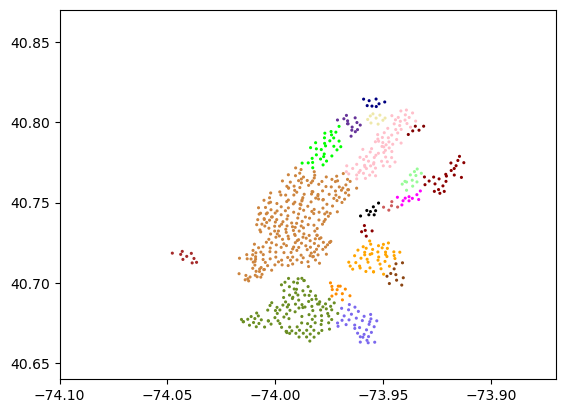

In [100]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(dbs_start_station.labels_))-1   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
x_=[]
y_=[]
c_=[]
for label, x_val, y_val in zip(dbs_start_station.labels_, start_station_df['longitude'], start_station_df['latitude']):
    if label==-1:
        continue
    x_.append(x_val)
    y_.append(y_val)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=1.5,c=c_)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

num_colors_end=len(set(dbs_end_station.labels_))-1
cluster_colors_end=random.choices(colors, k=num_colors_end)
x_end=[]
y_end=[]
c_end=[]
for label, x_val, y_val in zip(dbs_end_station.labels_, end_station_df['longitude'], end_station_df['latitude']):
    if label==-1:
        continue
    x_end.append(x_val)
    y_end.append(y_val)
    c_end.append(cluster_colors_end[label])
plt.scatter(x_end,y_end,s=1.5,c=c_end)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

## K-means

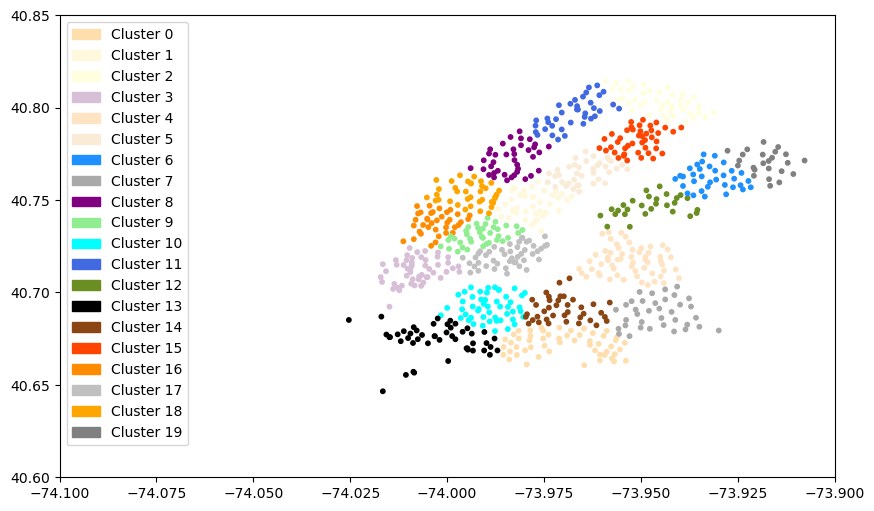

In [101]:
from sklearn.cluster import KMeans
from matplotlib.patches import Patch
K=20
k=KMeans(K)
k.fit(start_station_df)
dt_clusters=start_station_df.copy()
dt_clusters['cluster']=k.fit_predict(start_station_df)
num_colors=K  #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors = random.choices(colors,k=K)  

x_points=dt_clusters["longitude"]
y_points=dt_clusters["latitude"]
# Get labels and cluster centers
labels = dt_clusters["cluster"]
x_=[]
y_=[]
c_=[]
for label, x, y in zip(labels, x_points, y_points):
    if label == -1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
plt.figure(figsize=(10, 6))
plt.scatter(x_,y_,s=10,c=c_)
plt.xlim(-74.1,-73.9)
plt.ylim(40.6,40.85)
legend_patches = [
    Patch(color = cluster_colors[i], label=f"Cluster {i}")
    for i in range(K)
]
plt.legend(handles = legend_patches)
plt.show()

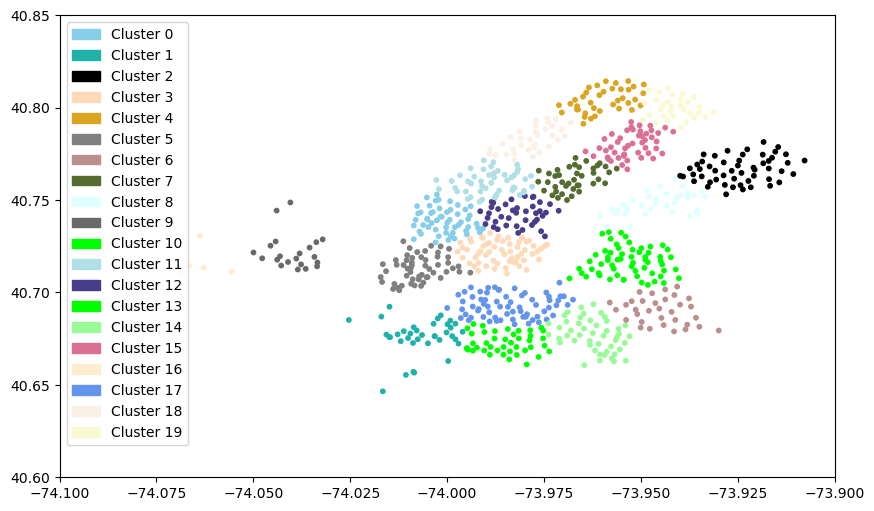

In [102]:
K=20
k=KMeans(K)
k.fit(end_station_df)
dt_clusters=end_station_df.copy()
dt_clusters['cluster']=k.fit_predict(end_station_df)
num_colors=K  #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors = random.choices(colors,k=K)  

x_points=dt_clusters["longitude"]
y_points=dt_clusters["latitude"]
# Get labels and cluster centers
labels = dt_clusters["cluster"]
x_=[]
y_=[]
c_=[]
for label, x, y in zip(labels, x_points, y_points):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
plt.figure(figsize=(10, 6))
plt.scatter(x_,y_,s=10,c=c_)
plt.xlim(-74.1,-73.9)
plt.ylim(40.6,40.85)
legend_patches = [
    Patch(color = cluster_colors[i], label=f"Cluster {i}")
    for i in range(K)
]
plt.legend(handles = legend_patches)
plt.show()

In [103]:
# Merge cluster assignments to the original dataframe
f_cluster_merge = f.merge(dt_clusters['cluster'], left_on='end_station_id', right_index=True, how='left')

f_cluster_merge.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
Trip ID,,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,0,False,12
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,0,False,11
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,0,False,11
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,0,False,11
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,0,False,18
